# **Hadoop Hand-On Lab**

## Enable Hadoop in Jupyter Notebook  

In [ ]:
# set hadoop environment variable
import os, sys

os.environ["HADOOP_VERSION"] = "3.3.0"
os.environ["HADOOP_TOOLS"] = "/opt/hadoop/current/share/hadoop/tools/lib"

# replace <Your User Name> with your own user name
os.environ["USER"] = "<Your User Name>"

# here we assume that our workspace is a folder called hadoop
os.environ["WORKSPACE"] = "/home/" + os.getenv("USER") + "/hadoop"

# append hadoop executable paths to the existing system path
%set_env PATH=/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/opt/jupyterhub/bin:/opt/hadoop/current/bin:/opt/spark/current/bin:/opt/hadoop/current/bin:/opt/mahout/current/bin

Optional: We will have to export the PATHs below in order to re-run in terminal with exact commands as in our Jupyer notebook.

```shell
export HADOOP_VERSION="3.3.0"
export HADOOP_TOOLS="/opt/hadoop/current/share/hadoop/tools/lib"
export WORKSPACE="/home/<Your User Name>/hadoop"
```

## Hadoop Intro

- Data sets that are so large or complex that traditional data processing application software is inadequate to deal with them. 
- Data analysis requires massively parallel software running on several servers.
- **Volume, Variety, Velocity, Variability and Veracity** describe Big Data properties.

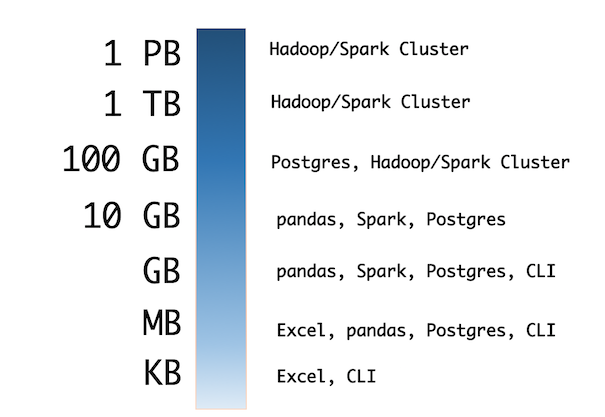

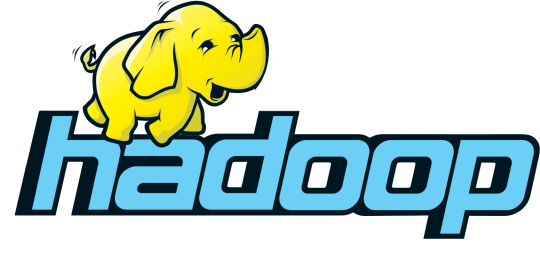

- Framework for running applications on large cluster. 
- The Hadoop framework transparently provides applications both reliability and data motion. 
- Hadoop implements the computational paradigm named **Map/Reduce**, where the application is divided into many small fragments of work, each of which may be executed or re-executed on any node in the cluster. 
- It provides a distributed file system (HDFS) that stores data on the compute nodes, providing very high aggregate bandwidth across the cluster.
- Both MapReduce and the **Hadoop Distributed File System** are designed so that node failures are automatically handled by the framework.

## HDFS

* It is a distributed file systems.
* HDFS is highly fault-tolerant and is designed to be deployed on low-cost hardware.
* HDFS is suitable for applications that have large data sets. 
* HDFS provides interfaces to move applications closer to where the data is located. The computation is much more efficient when the size of the data set is huge. 
* HDFS consists of a single NameNode with a number of DataNodes which manage storage. 
* HDFS exposes a file system namespace and allows user data to be stored in files. 
    1. A file is split by the NameNode into blocks stored in DataNodes. 
    2. The **NameNode** executes operations like opening, closing, and renaming files and directories.
    3. The **Secondary NameNode** stores information from **NameNode**. 
    4. The **DataNodes** manage perform block creation, deletion, and replication upon instruction from the NameNode.
    5. The placement of replicas is optimized for data reliability, availability, and network bandwidth utilization.
    6. User data never flows through the NameNode.
* Files in HDFS are write-once and have strictly one writer at any time.
* The DataNode has no knowledge about HDFS files.

## Command Line Cheat Sheet

#### Accessibility

All [HADOOP commands](http://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-common/FileSystemShell.html)  are invoked by the bin/hadoop Java script:
```shell
hadoop [SHELL_OPTIONS] COMMAND [GENERIC_OPTIONS] [COMMAND_OPTIONS]
```

#### Manage files and directories
```shell
hadoop fs -ls -h -R # Recursively list subdirectories with human-readable file sizes.
hadoop fs -cp  # Copy files from local to hdfs destination
hadoop fs -mv  # Move files from source to destination
hadoop fs -mkdir /foodir # Create a directory named /foodir	
hadoop fs -rm -r /foodir   # Remove a directory named /foodir	
hadoop fs -cat /foodir/myfile.txt #View the contents of a file named /foodir/myfile.txt	
```

#### Transfer files between nodes
##### put
```shell
hadoop fs -put [-f] [-p] [-l] [-d] [ - | <localsrc1> .. ]. <dst>
```
Copy single src, or multiple srcs from local file system to the destination file system. 

Options:

    -p : Preserves rights and modification times.
    -f : Overwrites the destination if it already exists.

```shell
hadoop fs -put localfile /user/hadoop/hadoopfile
hadoop fs -put -f localfile1 localfile2 /user/hadoop/hadoopdir
```
Similar to the fs -put command
- `moveFromLocal` : to delete the source localsrc after copy.
- `copyFromLocal` : source is restricted to a local file
- `copyToLocal` : destination is restricted to a local file


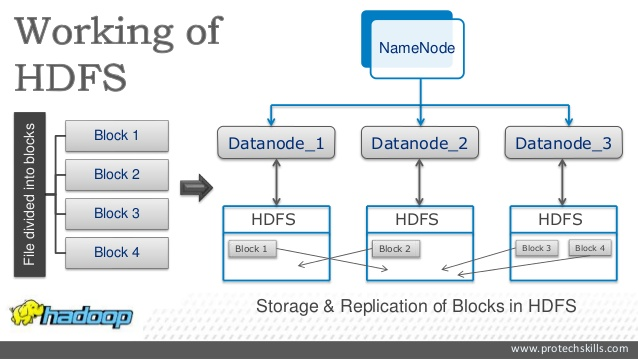

The Name Node is not in the data path. The Name Node only provides the map of where data is and where data should go in the cluster (file system metadata).

## **Lab 1**: Hadoop Cluster
**Task 1.1** Check that your HDFS home directory required to execute MapReduce jobs exists.
```bash
hadoop fs -ls /user/${USER}
```

Type the following commands: 
```bash
hadoop fs -ls
hadoop fs -mkdir lab1
```

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

**Task 1.2** Create a folder called <code>lab1</code> and add a file <code>user.txt</code> containing your name and the date into i:
```bash
mkdir -p ./lab1
echo "FirstName LastName" > ./lab1/user.txt
echo `date` >> ./lab1/user.txt 
cat ./lab1/user.txt
```

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

**Task 1.3** Copy it on  HDFS :
```bash
hadoop fs -copyFromLocal ./lab1/user.txt lab1/.
```

Check with:
```bash
hadoop fs -ls -R lab1
hadoop fs -cat lab1/user.txt 
hadoop fs -tail lab1/user.txt 
```

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

**Task 1.4** Remove file and directory on HDFS :
Remove the file:
```bash
hadoop fs -rm lab1/user.txt
```
Remove the directory:
```bash
hadoop fs -rm -r lab1
```

Check with:
```bash
hadoop fs -ls -R lab1 
```

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

## **Lab 2**: Command Line Hands-On Practice
1. Create a directory <code>lab2</code> in <code>HDFS</code>.
2. List the contents of a directory <code>lab2</code>.
3. Upload the file <code>today.txt</code> in <code>HDFS</code>.
```bash
mkdir -p ./lab2
date > ./lab2/today.txt
whoami >> ./lab2/today.txt
```
4. Display contents of file <code>today.txt</code>
5. Copy <code>today.txt</code> file from source to <code>lab2</code> directory.
6. Copy file <code>jps.txt</code> from/To Local file system to <code>HDFS</code>. The <code>jps</code> command will report the local VM identifier for each instrumented JVM found on the target system.
```bash
jps > ./lab2/jps.txt
```
7. Move file <code>jps.txt</code> from source to <code>lab2</code>.
8. Remove file <code>today.txt</code> from home directory in <code>HDFS</code>.
9. Display last few lines of <code>jps.txt</code>.
10. Display the help of <code>du</code> command and show the total amount of space in a human-readable fashion used by your home hdfs directory.
12. Display the help of <code>df</code> command and show the total amount of space available in the filesystem in a human-readable fashion.
13. With <code>chmod</code> change the rights of <code>today.txt</code> file. I has to be readable and writeable only by you.

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

## YARN

*YARN takes care of resource management and job scheduling/monitoring.*

- The **ResourceManager** is the ultimate authority that arbitrates resources among all the applications in the system. It has two components: **Scheduler** and **ApplicationsManager**.
- The **NodeManager** is the per-machine framework agent who is responsible for **Containers**, monitoring their resource usage (cpu, memory, disk, network) and reporting the same to the **ResourceManager/Scheduler**.

The per-application **ApplicationMaster** negotiates resources from the ResourceManager and working with the NodeManager(s) to execute and monitor the tasks.

- The **Scheduler** is responsible for allocating resources to the applications.

- The **ApplicationsManager** is responsible for accepting job-submissions, tracking their status and monitoring for progress.

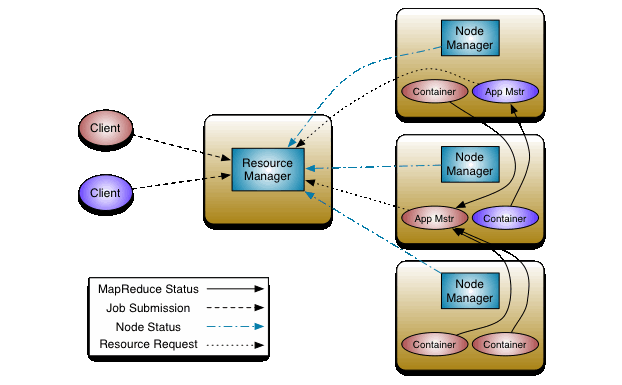

## **Lab 3**: Hadoop Streaming Using Python – Word Count Problem
Hadoop Streaming is a feature that comes with Hadoop and allows users or developers to use various different languages for writing MapReduce programs like Python, C++, Ruby, etc. It supports all the languages that can read from standard input and write to standard output. We will be implementing Python with Hadoop Streaming and will observe how it works. We will implement the word count problem in python to understand Hadoop Streaming. We will be creating mapper.py and reducer.py to perform map and reduce tasks.

Let’s create one file which contains multiple words that we can count.


**Task 3.1**: Create a folder called <code>lab3</code> and add a text file with the name <code>data.txt</code> with some content into it.
```shell
mkdir -p ./lab3
``` 
```shell
%%writefile ./lab3/data.txt
geeks for geeks is best online conding platform
welcome to geeks for geeks hadoop streaming lab
```

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%writefile ./lab3/data.txt
# Add Your Content Here

Check if <code>data.txt</code> is created in the <code>lab3</code> folder.

In [ ]:
%%sh
# Insert Your Code Here

**Task 3.2**: Create a <code>mapper.py</code> file that implements the mapper logic. It will read the data from <code>STDIN</code> and will split the lines into words, and will generate an output of each word with its individual count. 

In [ ]:
%%file ./lab3/mapper.py
#!/usr/bin/env python
  
# import sys because we need to read and write data to STDIN and STDOUT
import sys
  
# reading entire line from STDIN (standard input)
for line in sys.stdin:
    # to remove leading and trailing whitespace
    line = line.strip()
    # split the line into words
    words = line.split()
      
    # we are looping over the words array and printing the word
    # with the count of 1 to the STDOUT
    for word in words:
        # write the results to STDOUT (standard output);
        # what we output here will be the input for the
        # Reduce step, i.e. the input for reducer.py
        print("%s\t%s" % (word, 1))

Let’s test our mapper.py locally that it is working fine or not.

***Syntax***:
```shell
cat <text_data_file> | python <mapper_code_python_file>
```

In [ ]:
%%sh
# Insert Your Code Here

**Task 3.3**: Create a <code>reducer.py</code> file that implements the reducer logic. It will read the output of <code>mapper.py</code> from <code>STDIN </code> (standard input) and will aggregate the occurrence of each word and will write the final output to <code>STDOUT</code>. 

In [ ]:
%%file ./lab3/reducer.py
#!/usr/bin/env python

import sys
  
current_word = None
current_count = 0
word = None
  
# read the entire line from STDIN
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip()
    # splitting the data on the basis of tab we have provided in mapper.py
    word, count = line.split("\t", 1)
    # convert count (currently a string) to int
    try:
        count = int(count)
    except ValueError:
        # count was not a number, so silently
        # ignore/discard this line
        continue
  
    # this IF-switch only works because Hadoop sorts map output
    # by key (here: word) before it is passed to the reducer
    if current_word == word:
        current_count += count
    else:
        if current_word:
            # write result to STDOUT
            print("%s\t%s" % (current_word, current_count))
        current_count = count
        current_word = word
  
# do not forget to output the last word if needed!
if current_word == word:
    print("%s\t%s" % (current_word, current_count))

Now let’s check our reducer code <code>reducer.py</code> with <code>mapper.py</code> is it working properly or not with the help of the below command.

<pre>
cat ./lab3/data.txt | python ./lab3/mapper.py | sort -k1,1 | python ./lab3/reducer.py
</pre>

In [ ]:
%%sh
# Insert Your Code Here

**Task 3.4**: Let’s deploy our MapReduce Python code into the Hadoop environemnt.

Now make a directory <code>lab3</code> in our HDFS in the root directory that will store our <code>data.txt</code> file with the below command.
<pre>
hadoop fs -mkdir -p lab3
hadoop fs -mkdir -p lab3/input
</pre>

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

Copy <code>data.txt</code> to this folder in our <code>HDFS</code> with help of <code>copyFromLocal</code> command.

Syntax to copy a file from your local file system to the HDFS is given below:
<pre>
hadoop fs -copyFromLocal /path 1 /path 2 .... /path n /destination
</pre>

In [ ]:
%%sh
# Insert Your Code Here

Now our data file has been sent to <code>HDFS</code> successfully. we can check whether it sends or not by using the below command or by manually visiting our HDFS. 

<pre>
hadoop fs -ls lab3/input    # list down content of ~/lab3 directory
</pre>

In [ ]:
%%sh
# Insert Your Code Here

Let’s give executable permission to our <code>mapper.py</code> and <code>reducer.py</code> with the help of below command.
<pre>
chmod +x ./lab3/mapper.py ./lab3/reducer.py     # changing the permission to read, write, execute for user, group and others
</pre>

In [ ]:
%%sh
# Insert Your Code Here

Then we can observe that we have changed the file permission.

In [ ]:
%%sh
# Insert Your Code Here

**Task 3.5**: Now let’s run our python files with the help of the Hadoop streaming utility as shown below. We first create a *shell script*, called <code>wordcount.sh</code> with the content below.

```shell
hadoop jar ${HADOOP_TOOLS}/hadoop-streaming-${HADOOP_VERSION}.jar \
    -files ${WORKSPACE}/lab3/mapper.py,${WORKSPACE}/lab3/reducer.py \
    -mapper mapper.py \
    -reducer reducer.py \
    -input lab3/input/*.txt \
    -output lab3/output
```

We make <code>wordcount.sh</code> to be executable and then run the script using as follow:
```shell
chmod +x ./lab3/wordcount.sh
${WORKSPACE}/lab3/wordcount.sh
```

If <code>lab3/output</code> has already existed, we will encounter error:
```shell
ERROR streaming.StreamJob: Error Launching job : Output directory hdfs://lena-master/user/${USER}/lab3/output already exists
```
In this case, we must delete the folder before executing our <code>mapreduce</code> code.
```shell
hadoop fs -rm -R lab3/output
```

In [ ]:
%%file ./lab3/wordcount.sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In the above command in <code>-output</code>, we will specify the location in <code>HDFS</code> where we want our output to be stored. So let’s check our output in output file at location <code>lab3/output/part-00000</code>. We can check results with the help of <code>cat</code> command as shown below.
```shell
hadoop fs -ls lab3/output
hadoop fs -cat lab3/output/part-00000
```

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

**Task 3.6**: Until now, we created a text file (2 lines), i.e. <code>data.txt</code>, and used it as an input for our MapReduce code. 

Now, let us use the data file, i.e. <code>books.txt</code> & <code>books2.txt</code>, specified in <code>UoL's 2.20 Programming Activity</code>. To download <code>books.txt</code> & <code>books2.txt</code> and save into <code>./lab3</code>, we can either 

- manually download the file to our local computer and then upload it using Jupyter notebook (or <code>ssh</code>), or
- through <code>wget</code> with the command line below: (e.g. for <code>books.txt</code>)
```code
wget -P ./lab3 https://learn.london.ac.uk/pluginfile.php/309878/mod_page/content/19/books.txt
```

Then, we confirm if the file is downloaded as expected.

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

**Task 3.7**: Copy <code>books.txt</code> and <code>books2.txt</code> to our HDFS lab3/input folder. We can either leave data.txt in the HDFS folder or delete. The hadoop framework is capable of processing multiple files in the folder. 

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

**Task 3.8**: We now rerun our <code>MapReduce</code> code, but now with <code>*.txt</code> (i.e. <code>books1.txt</code> and <code>books2.txt</code>)as an input. We can check results with the help of <code>cat</code> command as shown below. 

Note: As before, the <code>lab3/output</code> folder must not exist before we run our MapReduce code. If it does, then we must delete it before running the code.

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

**Task 3.9**: Let us modify the MapReduce pipeline (Refer: UoL's Topic 3 Programming Activity). https://learn.london.ac.uk/pluginfile.php/309902/mod_page/content/19/Topic3_ProgrammingActivity.html?time=1605185103860

Let's introduce some text normalization to the pipeline developed above. Copy your scripts to a new set (to save the originals) and add the following three features:

- Discard all punctuation when counting words
- Convert all text to lower case
- Convert any token (ie. word) that contains one or more digits (0-9) to the string 'NOMBER', uppercase
- Discard any words that occur less than 3 times overall
- Discard any words that occur more than 800 times overall
- Note Some of these features should be implemented in the mapper and some in the reducer. And remember, you can test this functionality with the serial pipeline deascribed as before.
```shell
cat ./lab3/data.txt | python ./lab3/mapper.py | sort -k1,1 | python ./lab3/reducer.py
```

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

**Task 3.10**: Our current mapper is creating an <code>IO</code> stream of key-value (which 1) pairs, e.g. <code>(word, 1)</code> to the disk before they are sorted and sent to the reducer. The IO operations are in general expensive. For <code>WordCount</code>, we can locally reduce the results from a local mapper before they are IO streamed for the shuffle & sort phase. This process is called <code>combine</code>, which is a reduce operation which is carried out locally at the same node where the mapper is. The combiner can in overall make our MapReduce code be more efficient.
    
We can utilise the <code>combiner</code> feature by modifying our <code>wordcount.sh</code> as follow below.

```shell
hadoop jar ${HADOOP_TOOLS}/hadoop-streaming-${HADOOP_VERSION}.jar \
    -files ${WORKSPACE}/lab3/mapper.py,${WORKSPACE}/lab3/reducer.py \
    -mapper mapper.py \
    -combiner reducer.py \                            
    -reducer reducer.py \
    -input lab3/input/*.txt \
    -output lab3/output
```

Observe the differences between with and without combiner MapReduce job output, particularly <code>Combine input records</code>, <code>Combine output records</code>, </code>Reduce input groups</code>, </code>Reduce shuffle bytes</code> and </code>Reduce input records</code>.

The differences will be more apparent if our input data is large.

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

## **Lab 4**: Weather Data Problem

Here, we will write a Map-Reduce program for analyzing weather datasets to understand its data processing programming model. Weather sensors are collecting weather information across the globe in a large volume of log data. This weather data is semi-structured and record-oriented.

This data is stored in a line-oriented ASCII format, where each row represents a single record. Each row has lots of fields like longitude, latitude, daily max-min temperature, daily average temperature, etc. for easiness, we will focus on the main element, i.e. temperature. We will use the data from the National Centres for Environmental Information (NCEI). 

#### **Problem Statement**
Analyzing weather data to find <code>Min</code>, <code>Max</code>, <code>Mean</code>, <code>Variance</code> and <code>Median</code> for each day using MapReduce Hadoop.

**Task 4.1**: Create a folder called <code>lab4</code>, which we will add our weather data files into it.
```shell
mkdir -p ./lab4
``` 

In [ ]:
%%sh
# Insert Your Code Here

**Task 4.2**: We can download the dataset from the URL below:
```shell
https://learn.london.ac.uk/mod/folder/view.php?id=110034
```
There are 4 .txt files in the folder, each with >150MB in size. Their direct URLs are with parameters. It's not possible to download using <code>wget</code>.

Here, we shall first download them to the local and then upload them to Jupyter notebook. Once complete, we confirm if the files are uploaded as expected.

In [ ]:
%%sh
# Insert Your Code Here

**Task 4.2**: On HDFS, first create a folder called <code>lab4</code> and then a subfolder called <code>input</code>
Copy <code>200704hourly.txt</code>, <code>200705hourly.txt</code>, <code>200706hourly.txt</code> and 
<code>200707hourly.txt</code> to the newly created <code>lab4/input</code> HDFS folder.

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

**Task 4.4**: We can preview our dataset by using the command below:
```shell
head ./lab4/200704hourly.txt
```
The data contains <code>Wban Number</code>, a weather station number, <code>YearMonthDay</code>, a measurement date, and various measurements. In this lab, we are particularly interested in <code>YearMonthDay</code> and <code>Dry Bulb Temp</code>, temperature measured at the weather station.

In [ ]:
%%sh
# Insert Your Code Here

**Task 4.5**: For development purpose, it is convenient to work with a scaled-down version of our dataset. This will allow a faster run or debug and easier verify our calculation.

We can create a sub-dataset, says first 100 lines, by using the command line below:
```sh
head --lines 101 ./lab4/200704hourly.txt > ./lab4/tiny-weather-data.txt
```
The additional <code>1</code> is for the file header. Confirm <code>tiny-weather-data.txt</code> is created and preview its content.

As before, we also copy <code>tiny-weather-data.txt</code> to our HDFS <code>lab4/input</code> folder.  

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

**Task 4.6**: Let's create a MapReduce pipeline for <code>Min</code>. We will be also creating for <code>Max</code>, <code>Mean</code>, <code>Variance</code> and <code>Median</code>, hence we shall organise our code into sub-folders, for HDFS output in particular, e.g. <code>lab4/output/min</code>.

Note: we can test our MapReduce functionality with the serial pipeline deascribed as before.
```shell
cat ./lab4/tiny-weather-data.txt | python ./lab4/mapper.py | sort -k1,1 | python ./lab4/min-reducer.py
```

In [ ]:
%%file ./lab4/mapper.py
# Insert Your Code Here

In [ ]:
%%file ./lab4/reducer.py
# Insert Your Code Here

In [ ]:
%%file ./lab4/min-temp.sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

**Task 4.7**: If we PoC our MapReduce code on <code>tiny-weather-data.txt</code>, we can check its correctness using <code>Pandas</code>'s <code>groupby</code> and <code>aggregate</code> functions, e.g.
```shell
df.groupby(by=["YearMonthDay"])["Dry BultTemp"].mean()
```

Confirm if our MapReduce code is correctly producing an aggregate. 

In [ ]:
# Insert Your Code Here

**Task 4.8**: Our data files, <code>200704hourly.txt</code>, <code>200705hourly.txt</code>, <code>200706hourly.txt</code> and Mcode>200707hourly.txt</code>, are >150MB, therefore they will partition into chunks. Consequently, some file chunk will have header and some will not. Until now, our mapper will just ignore the first line, i.e. header and then start the mapping task. 

We shall iterate back and modify your mapper code to also handle the case of missing header, assumming that some partitions will not have header.

What-If: we are always ignoring the first line, i.e. all data chunks will have header, then we will be leaving one data point during the mapper stage. It will not cause an error. 

In [ ]:
%%sh
# Insert Your Code Here

**Task 4.9**: Wha-If: an entry for <code>Dry Bulb Temp</code> has <code>N/A</code>, for an example, instead of number. Our mapper will likely throw an exception error.

Let's edit one entry in our <code>tiny-weather-data.txt</code> by replacing the numerical reading with <code>N/A</code>. We can do this by open the file in JupyterHub and manually change the entry.

Again, we shall iterate back and modify your mapper code to also handle the case of when <code>Dry Bulb Temp</code> contains non-numeric values.

In [ ]:
%%sh
# Insert Your Code Here

**Task 4.10**: Let's also create MapReduce pipelines for <code>Max</code>, <code>Mean</code>, <code>Variance</code> and <code>Median</code>. 

Note: For <code>mapper</code>, we will be able to use the same mapper (developed for <code>Min</code>) for the other pipelines. 

In [ ]:
%%sh
# Insert Your Code Here

**Task 4.11**: We can further improve our current <code>MapReduce</code> pipelines by using <code>Combiner</code>. Straightforwardly, we will be able to use the reducer developed as a combiner for <code>Min</code> and <code>Max</code>. However, we will need to create new ones for <code>Mean</code> and <code>Variance</code>.

Compare the performances between with and without a combiner.

How about <code>Median</code>?

In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%file ./lab4/mean-combiner.py
# Insert Your Code Here

In [ ]:
%%file ./lab4/variance-combiner.py
# Insert Your Code Here